In [2]:
import pandas as pd
import numpy as np

In [3]:
# read 3 drugs
dataset_3comb = pd.read_csv('doi_10_5061_dryad_sm847__v20181016/db_drugs_3s.tsv', sep='\t')
dataset_4comb = pd.read_csv('doi_10_5061_dryad_sm847__v20181016/db_drugs_4s.tsv', sep='\t')
dataset_5comb = pd.read_csv('doi_10_5061_dryad_sm847__v20181016/db_drugs_5s.tsv', sep='\t')
dataset_3comb['drug_names'] = dataset_3comb[['drug_name_A', 'drug_name_B', 'drug_name_C']].values.tolist()
dataset_4comb['drug_names'] = dataset_4comb[['drug_name_A', 'drug_name_B', 'drug_name_C', 'drug_name_D']].values.tolist()
dataset_5comb['drug_names'] = dataset_5comb[['drug_name_A', 'drug_name_B', 'drug_name_C', 'drug_name_D', 'drug_name_E']].values.tolist()

In [4]:
# refined dataset
data = pd.read_csv('refined_drug_data.csv', sep=';')
data = data.fillna('')
data['drug_names'] = data[['Drug_1', 'Drug_2', 'Drug_3', 'Drug_4', 'Drug_5', 'Drug_6', 'Drug_7', 'Drug_8']].values.tolist()
data['drug_names'] = data['drug_names'].apply(lambda x: [i.lower() for i in x if i])

data['drug_names']

0      [carvedilol, esomeprazole, levothyroxine, tram...
1      [amlodipine, metoprolol, omeprazole, simvastat...
2      [alendronate, atorvastatin, levothyroxine, lis...
3                    [amlodipine, losartan, simvastatin]
4      [lisinopril, metoprolol, omeprazole, sertralin...
                             ...                        
907                     [atenolol, lisinopril, warfarin]
908         [hydrochlorothiazide, lisinopril, metformin]
909    [amlodipine, glipizide, ibuprofen, levothyroxi...
910                 [albuterol, montelukast, prednisone]
911         [albuterol, citalopram, ibuprofen, tramadol]
Name: drug_names, Length: 912, dtype: object

In [5]:
# check_capsule = ['carvedilol', 'esomeprazole', 'thyroxine', 'tramadol']
# for j in range(len(dataset_4comb)):
#     if check_capsule[0] in dataset_4comb['drug_names'][j] \
#     and check_capsule[2] in dataset_4comb['drug_names'][j] \
#         and check_capsule[1] in dataset_4comb['drug_names'][j]:
#         print(dataset_4comb['drug_names'][j])


In [6]:
IS_DEBUG = False
def print_debug(*args):
    if IS_DEBUG:
        print(*args)

In [7]:

#  for each data in data['drug_names'], check if it is in dataset_3comb, dataset_4comb, dataset_5comb and add the corresponding exact_exposure_count
data['exact_exposure_count'] = 0
for i in range(len(data)):
    current_recept = list(data['drug_names'][i])
    print_debug(current_recept)
    current_length = len(current_recept)

    if 'levothyroxine' in current_recept:
        current_recept[current_recept.index('levothyroxine')] = 'thyroxine'


    if current_length == 3:
        for j in range(len(dataset_3comb)):
            if set(current_recept) == set(dataset_3comb['drug_names'][j]):
                data['exact_exposure_count'][i] = dataset_3comb['exact_exposure_count'][j]
                print_debug(data['exact_exposure_count'][i])
                break
        if data['exact_exposure_count'][i] == 0:
            data['exact_exposure_count'][i] = 1
    elif current_length == 4:
        for j in range(len(dataset_4comb)):
            if set(current_recept) == set(dataset_4comb['drug_names'][j]):
                data['exact_exposure_count'][i] = dataset_4comb['exact_exposure_count'][j]
                print_debug(data['exact_exposure_count'][i])
                break
        if data['exact_exposure_count'][i] == 0:
            data['exact_exposure_count'][i] = 1
    elif current_length == 5:
        for j in range(len(dataset_5comb)):
            if set(current_recept) == set(dataset_5comb['drug_names'][j]):
                data['exact_exposure_count'][i] = dataset_5comb['exact_exposure_count'][j]
                print_debug(data['exact_exposure_count'][i])
                break
        if data['exact_exposure_count'][i] == 0:
            data['exact_exposure_count'][i] = 1
        # if data['exact_exposure_count'][i] == 0:
        #     for j in range(len(dataset_4comb)):
        #         if set(current_recept[:4]) == set(dataset_4comb['drug_names'][j]):
        #             data['exact_exposure_count'][i] = dataset_4comb['exact_exposure_count'][j]
        #     if data['exact_exposure_count'][i] !=0:
        #         data['drug_names'][i] = current_recept[:4]
    # elif current_length > 5:
    #     #take random 5 drugs
    #     for j in range(len(dataset_5comb)):
    #         if set(current_recept[:5]) == set(dataset_5comb['drug_names'][j]):
    #             data['exact_exposure_count'][i] = dataset_5comb['exact_exposure_count'][j]
    #     if data['exact_exposure_count'][i] !=0:
    #         data['drug_names'][i] = current_recept[:5]
    else:
        data['exact_exposure_count'][i] = 1
        print_debug('default 1')

/var/folders/yf/dq_l9dq53v1249tl5361zffr0000gn/T/ipykernel_49603/1152002296.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['exact_exposure_count'][i] = 1
/var/folders/yf/dq_l9dq53v1249tl5361zffr0000gn/T/ipykernel_49603/1152002296.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['exact_exposure_count'][i] = 1
/var/folders/yf/dq_l9dq53v1249tl5361zffr0000gn/T/ipykernel_49603/1152002296.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [8]:
data

print('Total: ', data.shape[0]) # 1/3 of capsules was not found in the dataset
print('Not found: ', data[data['exact_exposure_count'] == 1].shape[0])
print('Capsules with more than 5 drugs: ', data[data['drug_names'].apply(lambda x: len(x) > 5)].shape[0])

# 265 capsules with 3-5 drugs not found

data_without_1_occurences = data[data['exact_exposure_count'] != 1]

Total:  912
Not found:  333
Capsules with more than 5 drugs:  68


In [10]:
# data store
data.to_csv('capsules_with_freq.csv', sep=';', index=False)

In [8]:
dosages = pd.read_csv('drugs_dosing.csv', sep=';')
all_40_drugs = dosages['Drug Names'].values.tolist()
all_40_drugs = [i.lower() for i in all_40_drugs]
# all_40_drugs

array([[1.54432e+05, 9.27000e+02, 0.00000e+00, ..., 5.00000e+00,
        3.63000e+02, 2.98000e+02],
       [9.27000e+02, 2.70766e+05, 1.00000e+00, ..., 1.49900e+03,
        7.50000e+02, 1.70700e+03],
       [0.00000e+00, 1.00000e+00, 8.43390e+04, ..., 0.00000e+00,
        1.13000e+02, 0.00000e+00],
       ...,
       [5.00000e+00, 1.49900e+03, 0.00000e+00, ..., 3.77918e+05,
        2.64900e+03, 1.91000e+02],
       [3.63000e+02, 7.50000e+02, 1.13000e+02, ..., 2.64900e+03,
        2.69496e+05, 2.00000e+00],
       [2.98000e+02, 1.70700e+03, 0.00000e+00, ..., 1.91000e+02,
        2.00000e+00, 7.76080e+04]])

In [33]:
all_40_drugs_sorted

['lisinopril',
 'simvastatin',
 'metoprolol',
 'metformin',
 'levothyroxine',
 'amlodipine',
 'hydrochlorothiazide',
 'furosemide',
 'atorvastatin',
 'omeprazole',
 'atenolol',
 'glipizide',
 'albuterol',
 'warfarin',
 'aspirin',
 'potassium chloride',
 'esomeprazole',
 'clopidogrel',
 'carvedilol',
 'valsartan',
 'losartan',
 'gabapentin',
 'rosuvastatin',
 'lovastatin',
 'pioglitazone',
 'pravastatin',
 'ranitidine',
 'tramadol',
 'ibuprofen',
 'insulin glargine',
 'citalopram',
 'alendronate',
 'allopurinol',
 'montelukast',
 'fexofenadine',
 'tamsulosin',
 'zolpidem',
 'sertraline',
 'fluticasone nasal',
 'prednisone']

In [31]:
coocurrence_matrix = np.zeros((40, 40))
sorted_drug_names = data['drug_names'].explode().value_counts().index
all_40_drugs_sorted = [i for i in sorted_drug_names if i in all_40_drugs]

for i in data.iterrows():
    combination = i[1]['drug_names']
    combination_idxs = [all_40_drugs_sorted.index(drug) for drug in combination if drug in all_40_drugs_sorted]
    exact_exposure_count = 100 if i[1]['exact_exposure_count'] == '<100' else i[1]['exact_exposure_count']
    for drug1 in combination_idxs:
        for drug2 in combination_idxs:
            coocurrence_matrix[drug1][drug2] += int(exact_exposure_count)


barplot_freq_of_drug = np.zeros(40)
all_the_drugs = []
for i in data.iterrows():
    combination = i[1]['drug_names']

    combination_idxs = [all_40_drugs_sorted.index(drug) for drug in combination if drug in all_40_drugs_sorted]
    all_the_drugs += combination_idxs
    
    exact_exposure_count = 100 if i[1]['exact_exposure_count'] == '<100' else i[1]['exact_exposure_count']
    for drug in combination:
        if drug in all_40_drugs:
            barplot_freq_of_drug[all_40_drugs.index(drug)] += int(exact_exposure_count)
barplot_freq_of_drug

array([1.5443200e+05, 2.7076600e+05, 8.4339000e+04, 2.6617870e+06,
       1.2081000e+04, 1.4103990e+06, 2.8989450e+06, 1.9549400e+05,
       1.3690300e+05, 1.6646710e+06, 9.1979000e+04, 6.7155000e+04,
       2.9000000e+01, 3.3081600e+05, 2.9734000e+04, 1.1207930e+06,
       1.0440801e+07, 3.0545000e+04, 3.8616000e+04, 2.2467050e+06,
       1.6019701e+07, 7.3403000e+05, 5.1631000e+05, 5.7276050e+06,
       5.5871010e+06, 1.4221600e+05, 6.7423300e+05, 2.2759200e+05,
       7.2000000e+01, 3.2093300e+05, 6.9048000e+04, 2.9114000e+04,
       1.8261900e+05, 8.8766000e+04, 1.2818349e+07, 1.4516800e+05,
       1.9890000e+04, 3.7791800e+05, 2.6949600e+05, 7.7608000e+04])

In [34]:
# normalize the coocurrence matrix
normalized_coocurrence_matrix = coocurrence_matrix / coocurrence_matrix.sum(axis=0)

# store the coocurrence matrix
np.savetxt('normalized_coocurrence_matrix.csv', normalized_coocurrence_matrix, delimiter=',')

In [17]:
normalized_barplot_freq_of_drug 

array([1.5443200e+05, 2.7076600e+05, 8.4339000e+04, 2.6617870e+06,
       1.2081000e+04, 1.4103990e+06, 2.8989450e+06, 1.9549400e+05,
       1.3690300e+05, 1.6646710e+06, 9.1979000e+04, 6.7155000e+04,
       2.9000000e+01, 3.3081600e+05, 2.9734000e+04, 1.1207930e+06,
       1.0440801e+07, 3.0545000e+04, 3.8616000e+04, 2.2467050e+06,
       1.6019701e+07, 7.3403000e+05, 5.1631000e+05, 5.7276050e+06,
       5.5871010e+06, 1.4221600e+05, 6.7423300e+05, 2.2759200e+05,
       7.2000000e+01, 3.2093300e+05, 6.9048000e+04, 2.9114000e+04,
       1.8261900e+05, 8.8766000e+04, 1.2818349e+07, 1.4516800e+05,
       1.9890000e+04, 3.7791800e+05, 2.6949600e+05, 7.7608000e+04])

In [19]:
# store  values freq barplot_freq_of_drug_sorted, all_40_drugs_sorted to file 
import pickle
with open('barplot_freq_of_drug_sorted.pkl', 'wb') as f:
    pickle.dump(barplot_freq_of_drug, f)

with open('all_40_drugs_sorted.pkl', 'wb') as f:
    pickle.dump(all_40_drugs, f)


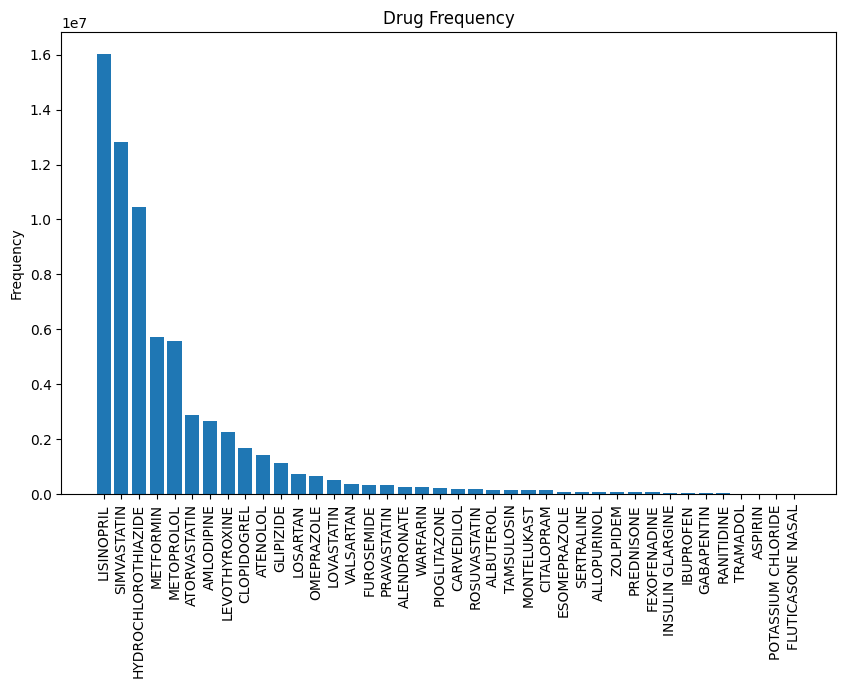

In [16]:
import matplotlib.pyplot as plt

# sort the barplot_freq_of_drug
barplot_freq_of_drug_sorted, all_40_drugs_sorted = zip(*sorted(zip(barplot_freq_of_drug, all_40_drugs), reverse=True))
all_40_drugs_sorted = [i.upper() for i in all_40_drugs_sorted]
plt.figure(figsize=(10, 6))
plt.bar(all_40_drugs_sorted, barplot_freq_of_drug_sorted)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Drug Frequency')
plt.show()

[]

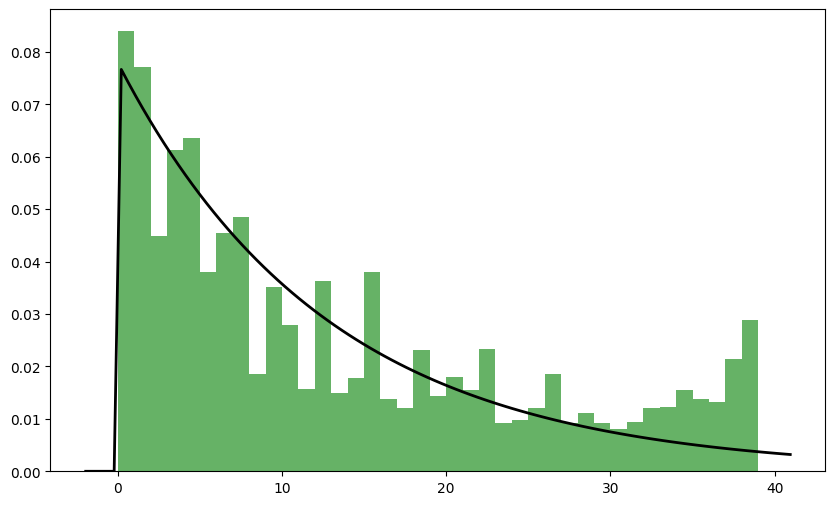

In [109]:
from scipy.stats import expon

# Fit a expon distribution to the data:
params = expon.fit(all_the_drugs)
params

# Plot the histogram.
plt.figure(figsize=(10, 6))
plt.hist(all_the_drugs, bins=39, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = expon.pdf(x, *params)
plt.plot(x, p, 'k', linewidth=2)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'lisinopril'),
  Text(1, 0, 'simvastatin'),
  Text(2, 0, 'hydrochlorothiazide'),
  Text(3, 0, 'metformin'),
  Text(4, 0, 'metoprolol'),
  Text(5, 0, 'atorvastatin'),
  Text(6, 0, 'amlodipine'),
  Text(7, 0, 'levothyroxine'),
  Text(8, 0, 'clopidogrel'),
  Text(9, 0, 'atenolol'),
  Text(10, 0, 'glipizide'),
  Text(11, 0, 'losartan'),
  Text(12, 0, 'omeprazole'),
  Text(13, 0, 'lovastatin'),
  Text(14, 0, 'valsartan'),
  Text(15, 0, 'furosemide'),
  Text(16, 0, 'pravastatin'),
  Text(17, 0, 'alendronate'),
  Text(18, 0, 'warfarin'),
  Text(19, 0, 'pioglitazone'),
  Text(20, 0, 'carvedilol'),
  Text(21, 0, 'rosuvastatin'),
  Text(22, 0, 'albuterol'),
  Text(23, 0, 'tamsulosin'),
  Text(24, 0, 'montelukast'),
  Text(25, 0, 'citalopram'),
  Text(26, 0

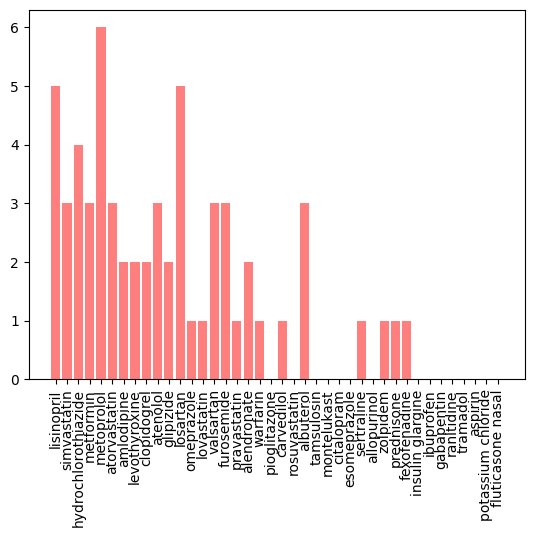

In [127]:
# generate 60 samples (from 0 to 40) from the fitted distribution
samples = expon.
# from 0 to 40
samples = [int(i) % 40 for i in samples]


# add the samples to the barplot
barplot_freq_of_drug_sorted_2 = np.zeros(40)
for i in samples:
    barplot_freq_of_drug_sorted_2[i] += 1
plt.bar(all_40_drugs_sorted, barplot_freq_of_drug_sorted_2, color='r', alpha=0.5)
plt.xticks(rotation=90)


In [133]:
expected_frequencies

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3])

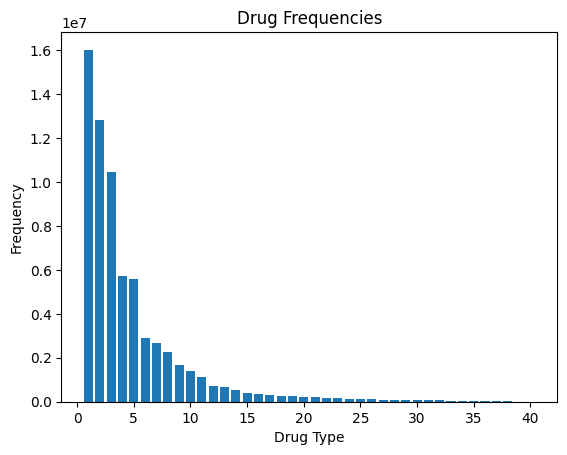

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 4]
Drug Assignment to Machines:
Machine 1: Drug 1
Machine 2: Drug 2
Machine 3: Drug 3
Machine 4: Drug 3
Machine 5: Drug 3
Machine 6: Drug 4
Machine 7: Drug 5
Machine 8: Drug 6
Machine 9: Drug 7
Machine 10: Drug 8
Machine 11: Drug 9
Machine 12: Drug 9
Machine 13: Drug 9
Machine 14: Drug 9
Machine 15: Drug 10
Machine 16: Drug 11
Machine 17: Drug 12
Machine 18: Drug 12
Machine 19: Drug 12
Machine 20: Drug 13
Machine 21: Drug 14
Machine 22: Drug 15
Machine 23: Drug 16
Machine 24: Drug 17
Machine 25: Drug 18
Machine 26: Drug 19
Machine 27: Drug 20
Machine 28: Drug 21
Machine 29: Drug 22
Machine 30: Drug 23
Machine 31: Drug 24
Machine 32: Drug 25
Machine 33: Drug 26
Machine 34: Drug 27
Machine 35: Drug 28
Machine 36: Drug 28
Machine 37: Drug 28
Machine 38: Drug 29
Machine 39: Drug 30
Machine 40: Drug 31
Machine 41: Drug 32
Machine 42: Drug 33
Machine 43: Drug 34
Machine 44: D

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Step 1: Fit the exponential distribution to the drug frequencies
# drug_frequencies = np.random.exponential(scale=10, size=40)
# drug_frequencies.sort()
drug_frequencies = barplot_freq_of_drug_sorted

# Plot the drug frequencies to visualize the distribution
plt.bar(range(1, 41), drug_frequencies)
plt.xlabel('Drug Type')
plt.ylabel('Frequency')
plt.title('Drug Frequencies')
plt.show()

# Estimate the rate parameter (lambda)
lambda_est = 1 / np.mean(drug_frequencies)

# Step 2: Calculate expected frequencies
total_machines = 50
expected_frequencies = expon.rvs(scale=1 / lambda_est, size=40)

# Normalize the expected frequencies to ensure they sum up to 60
expected_frequencies = expected_frequencies / expected_frequencies.sum() * total_machines
# print(expected_frequencies)

expected_frequencies = np.floor(expected_frequencies).astype(int)
expected_frequencies = [1 if i == 0 else i for i in expected_frequencies]
# print(expected_frequencies)
# print sorted
print(np.sort(expected_frequencies).tolist())


# Adjust the sum to be exactly 60
# while expected_frequencies.sum() < total_machines:
#     expected_frequencies[np.argmax(expected_frequencies)] += 1
# while expected_frequencies.sum() > total_machines:
#     expected_frequencies[np.argmax(expected_frequencies)] -= 1

# Step 3: Assign drugs to machines based on the expected frequencies
assignment = []
for drug, count in enumerate(expected_frequencies):
    assignment.extend([drug + 1] * count)

# Print the assignment
print("Drug Assignment to Machines:")
for i, drug in enumerate(assignment):
    print(f"Machine {i + 1}: Drug {drug}")

In [61]:
# In total we can have 60 machines. Each machine have 1 drug. There are 40 drugs in total. Based on histogram decide how many machines we need for each drug. 

# barplot_freq_of_drug_sorted
# freq1 + freq2 + freq3 + ... + freq40 = 60

def get_machine_frequences(total_number_of_machines, max_number_of_machines_per_drug, barplot_freq_of_drug_sorted):
    # total_number_of_machines is sum of all machines
    # max_number_of_machines_per_drug is the maximum number of machines that can be assigned to a single drug
    # barplot_freq_of_drug_sorted is the sorted list of frequencies of each drug
    # return the list of machines assigned to each drug
    machines = [0] * 40
    total_freq = sum(barplot_freq_of_drug_sorted)
    for i in range(40):
        machines[i] = int(barplot_freq_of_drug_sorted[i] / total_freq * total_number_of_machines)
        # if machines[i] > max_number_of_machines_per_drug:
        #     machines[i] = max_number_of_machines_per_drug
        if machines[i] == 0:
            machines[i] = 1

    difference = total_number_of_machines - sum(machines)
    # if 
    return machines


In [62]:
get_machine_frequences(60, 10, barplot_freq_of_drug_sorted)

sum(get_machine_frequences(60, 10, barplot_freq_of_drug_sorted))

80

In [43]:
heatmap = np.zeros((40, 40))
for i in data.iterrows():
    combination = i[1]['drug_names']
    exact_exposure_count = 100 if i[1]['exact_exposure_count'] == '<100' else i[1]['exact_exposure_count']
    for drug1 in combination:
        for drug2 in combination:
            if drug1 in all_40_drugs and drug2 in all_40_drugs:
                heatmap[all_40_drugs.index(drug1)][all_40_drugs.index(drug2)] += int(exact_exposure_count)

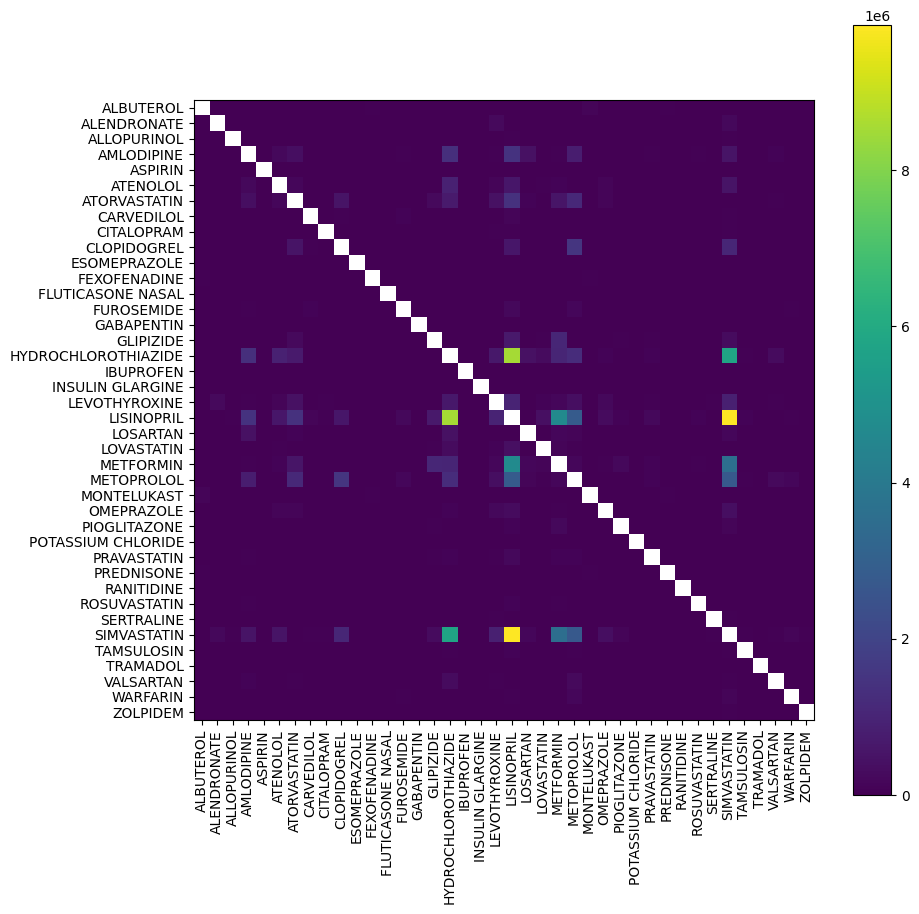

In [44]:
# heatmap_to_show = sorted_new.copy()
heatmap_to_show = heatmap.copy()

plt.figure(figsize=(10, 10))
heatmap_to_show[range(40), range(40)] = np.nan
plt.imshow(heatmap_to_show, cmap='viridis')
plt.colorbar()

plt.xticks(np.arange(40), [x.upper() for x in all_40_drugs], rotation=90)
plt.yticks(np.arange(40), [x.upper() for x in all_40_drugs])
plt.show()